# <center> **How To Win Your Fantasy Football League** <center>

<center> By: David Lytikainen, Samar Seth, Keshav Sawhney

## <center> Intro <center>

Every Sunday in the United States, people sit down and watch football with their families and relax on their day off. However, for some Americans, their Sundays are spent stressing over the same football game. Why are these people stressing? These people play fantasy football. People of all ages, from pre-teens to senior adults, log on to the ESPN and NFL fantasy football apps and investigate their fantasy roster as if it is a real football roster. As they log on to these apps, they watch shows such as “NFL Fantasy Live” and “Fantasy Football Focus Show” to try and gain whatever advantage they can over their league opponents. The United States of America is infatuated with fantasy football, for good reason, and we will go in depth into the numbers behind fantasy football in order to help these fellow fantasy football participants win their fantasy leagues.

There are three different types of scoring options for fantasy football: PPR, half-PPR, and standard scoring system. PPR stands for “point per reception,” so in these leagues every reception a player makes counts for 1 point plus any additional yard they gain is 0.1 point. In half-PPR leagues every reception gives 0.5 points plus any additional yard they gain is 0.1 point and in the standard scoring system no points are awarded for receptions, only for receiving yards which are each 0.1 points. Points are also awarded for any rushing yards they gain which are also 0.1 points each. Every receiving or rushing touchdown a player scores gives 6 points, while any touchdown a player throws is worth 4 points. The most used fantasy football option is either half-PPR or PPR, however, we will mainly focus on PPR scoring.

Digressing from fantasy football for a second, one of the most important measures for every human being is efficiency. Everyone is always trying to improve their lives to be more efficient with their time, more efficient with their money, or even more efficient with their travel. Efficiency is defined as generating the most output with the input that you have. This translates directly to fantasy football. Every player wants to be as efficient with their “touches” as possible. To simplify this, we will be defining our input or “touches” as any receptions or rushing attempts a player makes. Since we are combining the rushing and receiving attempts into one stat, this will make it harder to compare between different positions. This happens because, for the most part, running backs gather more rushing attempts throughout the game, while receivers gather more receptions throughout the game. This tutorial will go deeper into the numbers behind how efficient each position really is with the touches that they get.

## <center> Data Scraping <center>

To get our data, first we found a website that gives the PPR scoring statistics that we are looking for. We found the website below called “The Football Database,” which gives the rushing, receiving, and even the passing statistics for the 2021-2022 NFL season along with the PPR fantasy points each player scored. To be able to use this data in our tutorial, we will use requests to import the data, pandas to read and format the data, numpy to interpret the data, and matplotlib to display our results.

In [3]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import re

In [4]:
wrURL = 'https://www.footballdb.com/fantasy-football/index.html?pos=WR&yr=2021&wk=all&key=b6406b7aea3872d5bb677f064673c57f'
rbURL = 'https://www.footballdb.com/fantasy-football/index.html?pos=RB&yr=2021&wk=all&key=b6406b7aea3872d5bb677f064673c57f'
teURL = 'https://www.footballdb.com/fantasy-football/index.html?pos=TE&yr=2021&wk=all&key=b6406b7aea3872d5bb677f064673c57f'
flexURL = 'https://www.footballdb.com/fantasy-football/index.html?pos=flex&yr=2021&wk=all&key=b6406b7aea3872d5bb677f064673c57f'

session = requests.Session()
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36'}

def getTable(url):
    page = session.get(url, headers=headers)
    
    return pd.read_html(page.content.decode())

wr = getTable(wrURL)[0]
rb = getTable(rbURL)[0]
te = getTable(teURL)[0]
flex = getTable(flexURL)[0]

In this section, we are renaming our column names, as the data that we scraped did not have column names for each player, their bye week, and how many points they scored in fantasy in 2021-2022.

In [5]:
def clean_df(df):
    df.rename(columns={"Unnamed: 0_level_0":"Player"}, inplace=True)
    df.drop(columns={"Unnamed: 1_level_0":"Bye"}, inplace=True, level=0)
    df.rename(columns={"Unnamed: 2_level_0":"Pts"}, inplace=True)
    df["Player Name"] = list(map(lambda x: re.search("[A-Z][^\s]*\s[A-Z][^\.]*", x).group()[:-1], df["Player"]["Player"]))
    df.drop("Player", axis=1, inplace=True, level=0)
    
clean_df(wr)
clean_df(rb)
clean_df(te)
clean_df(flex)

In [6]:
wr.head()

Pts Passing                    Rushing             Receiving            \
    Pts*     Att Cmp Yds TD Int 2Pt     Att  Yds TD 2Pt       Rec   Yds  TD   
0  430.0       1   0   0  0   0   0       4   18  0   0       145  1947  16   
1  337.0       0   0   0  0   0   0       0    0  0   0       123  1553  11   
2  329.0       2   1  24  1   0   0      59  365  8   0        77  1405   6   
3  321.0       4   2  35  0   0   0       6   14  0   0       108  1616  10   
4  295.0       0   0   0  0   0   0       7   21  0   0        81  1455  13   

      Fumbles          Player Name  
  2Pt      FL TD                    
0   1       0  0       Cooper Kupp  
1   0       0  0     Davante Adams  
2   0       2  0      Deebo Samuel  
3   0       1  0  Justin Jefferson  
4   0       1  0     Ja'Marr Chase

These are the top 5 fantasy football scorers at the wide receiver position.

In [7]:
rb.head()

Pts Passing                    Rushing               Receiving          \
    Pts*     Att Cmp Yds TD Int 2Pt     Att   Yds  TD 2Pt       Rec  Yds TD   
0  362.0       0   0   0  0   0   0     332  1811  18   0        40  360  2   
1  331.0       0   0   0  0   0   0     206   911  12   1        70  647  8   
2  285.0       0   0   0  0   0   0     307  1200   7   0        74  467  3   
3  277.0       0   0   0  0   0   0     292  1205  13   0        42  314  3   
4  247.0       0   0   0  0   0   0     202   752  15   0        37  375  3   

      Fumbles         Player Name  
  2Pt      FL TD                   
0   0       2  0  Jonathan Taylor  
1   1       3  0    Austin Ekeler  
2   0       0  0     Najee Harris  
3   0       1  0        Joe Mixon  
4   0       0  0     James Conner

These are the top 5 fantasy football scorers at the running back position.

In [8]:
te.head()

Pts Passing                    Rushing            Receiving               \
    Pts*     Att Cmp Yds TD Int 2Pt     Att Yds TD 2Pt       Rec   Yds TD 2Pt   
0  292.0       0   0   0  0   0   0       1   0  0   0       107  1361  9   2   
1  254.0       0   0   0  0   0   0       2   3  1   0        92  1125  9   0   
2  201.0       0   0   0  0   0   0       0   0  0   0        78   808  8   1   
3  193.0       0   0   0  0   0   0       3  20  0   0        71   910  6   0   
4  173.0       0   0   0  0   0   0       1   4  0   0        74   763  5   0   

  Fumbles        Player Name  
       FL TD                  
0       0  0    Mark Andrews  
1       1  0    Travis Kelce  
2       0  0  Dalton Schultz  
3       1  0   George Kittle  
4       0  0       Zach Ertz

These are the top 5 fantasy football scorers at the tight end position.

In [9]:
flex.head()

Pts Passing                    Rushing               Receiving            \
    Pts*     Att Cmp Yds TD Int 2Pt     Att   Yds  TD 2Pt       Rec   Yds  TD   
0  430.0       1   0   0  0   0   0       4    18   0   0       145  1947  16   
1  362.0       0   0   0  0   0   0     332  1811  18   0        40   360   2   
2  337.0       0   0   0  0   0   0       0     0   0   0       123  1553  11   
3  331.0       0   0   0  0   0   0     206   911  12   1        70   647   8   
4  329.0       2   1  24  1   0   0      59   365   8   0        77  1405   6   

      Fumbles         Player Name  
  2Pt      FL TD                   
0   1       0  0      Cooper Kupp  
1   0       2  0  Jonathan Taylor  
2   0       0  0    Davante Adams  
3   1       3  0    Austin Ekeler  
4   0       2  0     Deebo Samuel

These are the top 5 fantasy football scorers at the all positions besides quarterback.

## <center> Data Analysis <center>

We will start our analysis by looking at the efficiency of all players throughout the whole season, even if they only “touched” the ball one time. Again, we will use “points per touch” as our efficiency method, as every fantasy football manager would love to see their player score as many points as possible every time they touch the ball. To incorporate skill positions players (running backs, wide receivers, and tight ends) who threw the ball into this analysis, we included passing completions as a touch. By doing this, our plot will show how the whole offense in the NFL in the 2021-2022 season fared in terms of points scored per touch.

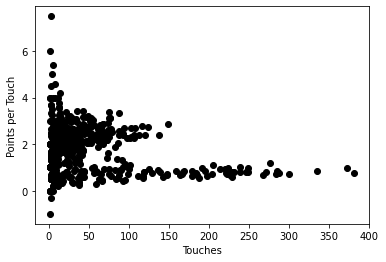

In [10]:
def ppt(df):
    df["Touches"] = df["Passing"]["Cmp"] + df["Rushing"]["Att"] + df["Receiving"]["Rec"]
    df["Points per Touch"] = df["Pts"]["Pts*"]/df["Touches"]

ppt(wr)
ppt(rb)
ppt(te)
ppt(flex)

plt.scatter(flex["Touches"], flex["Points per Touch"], c="black")
plt.xlabel("Touches")
plt.ylabel("Points per Touch")
plt.show()

As you can see in the graph above, there is a large amount of volatility in the points per touch for players with low touches (less than 25 touches). In this range, players points per touch ranged anywhere from above 6 points per touch to less than 0 points per touch. In fantasy football, the most points per touch that you can possibly get is 16.9 points on a 99 yard touchdown reception (6 points for a touchdown, 9.9 points for 99 receiving yards, 1 point for a reception). In real football terms this is near impossible to sustain for every touch and we see this here as the highest points per touch is 10 points less than the maximum. 
We looked back at our original dataset from “The Football Database” in order to find who the most efficient player was. This player is Ito Smith, who had one rushing attempt for 4 yards and a touchdown. For the 2021-2022 NFL season, Ito Smith was the golden standard for fantasy football in terms of points per touch.

As the amount of touches increases, the volatility in points per touch decreases significantly. In the range from 175 touches to 400 touches, all players stayed in the range of 0.5 to 1.5 touches. However, in the range of 25 to 175 touches there was still much volatility with more clumping of data which is likely due to different positions being compared at the same time. 

To enhance our analysis, we will now move on to analyzing each position one by one. In this section, we will analyze wide receivers first, then running backs, then tight ends. The reason why we are analyzing wide receivers first is because they are more important on a points per touch basis in a PPR league compared to a standard or half-PPR league, due to wide receivers catching the ball much more than running backs. In order to ignore any outliers, we will be looking at wide receivers with more than 50 touches, running backs with more than 100 touches, and tight ends with more than 15 touches. We will also look at the top 50 wide receivers, the top 50 running backs, and the top 15 tight ends in the league in terms of points scored.

In [11]:
#we will be analyzing these two subsets of receivers
wr50touches = wr[wr['Touches'] > 50]
top50wr = wr[:50]

#we will be analyzing these two subsets of running backs
rb100touches = rb[rb['Touches'] > 100]
top50rb = rb[:50]

#we will be analyzing these two subsets of tight ends
te40touches = te[te['Touches'] > 40]
top15te = te[:15]

wr50touches.reset_index()
rb100touches.reset_index()
te40touches.reset_index()

#Each of these functions simply create different plots for the dataframe given
def touches_vs_ppt(df, axis):
    axis.scatter(df["Touches"], df["Points per Touch"], c="black")
    
    minTouches = np.min(df["Touches"])
    maxTouches = np.max(df["Touches"])
    meanTouches = np.mean(df["Touches"])
    
    minPPT = np.min(df["Points per Touch"])
    maxPPT = np.max(df["Points per Touch"])
    meanPPT = np.mean(df["Points per Touch"])
    
    axis.plot([meanTouches, meanTouches], [minPPT, maxPPT], c="blue")
    axis.plot([minTouches, maxTouches], [meanPPT, meanPPT], c="blue")
    axis.set(xlabel = "Touches", ylabel = "Points per Touch")

def touches_vs_pts(df, axis):
    z = np.polyfit(df["Touches"], df["Pts"]["Pts*"], 1)
    p = np.poly1d(z)
    axis.plot(df["Touches"], p(df["Touches"]),"r--")
    
    axis.scatter(df["Touches"], df["Pts"]["Pts*"], c="black")
    axis.set(xlabel = "Touches", ylabel = "Points")
    
def ppt_vs_pts(df, axis):
    axis.scatter(df["Points per Touch"], df["Pts"]["Pts*"], c="black")
    axis.set(xlabel = "Points per Touch", ylabel = "Points")
    
def make_plts(df1, df2, axs):
    touches_vs_pts(df1, axs[0, 0])
    touches_vs_pts(df2, axs[0,  1])
    ppt_vs_pts(df1, axs[1, 0])
    ppt_vs_pts(df2, axs[1, 1])
    touches_vs_ppt(df1, axs[2, 0])
    touches_vs_ppt(df2, axs[2, 1])
    
def add_annot(player, axs):
    axs[0,0].annotate(player["Player Name"][0], (player["Touches"][0], player["Pts"]["Pts*"]))
    axs[0,1].annotate(player["Player Name"][0], (player["Touches"][0], player["Pts"]["Pts*"]))
    
    axs[1,0].annotate(player["Player Name"][0], (player["Points per Touch"][0], player["Pts"]["Pts*"]))
    axs[1,1].annotate(player["Player Name"][0], (player["Points per Touch"][0], player["Pts"]["Pts*"]))
    
    axs[2,0].annotate(player["Player Name"][0], (player["Touches"], player["Points per Touch"]))
    axs[2,1].annotate(player["Player Name"][0], (player["Touches"], player["Points per Touch"]))

Below we will plot the different analyses of a fantasy player's performance. The x and y values are named on each plot. The bottom two plots are the main plots we will be analyzing.

### For each position, the main plot we will be analyzing is the Touches vs Points per Touch graphs. These are the bottom two graphs.
In these plots, we added two lines: (1) which represents the mean touches and (2) which represents the mean points per touch. We will use these lines and statistics later in our Hypothesis testing section.


### Wide Receivers

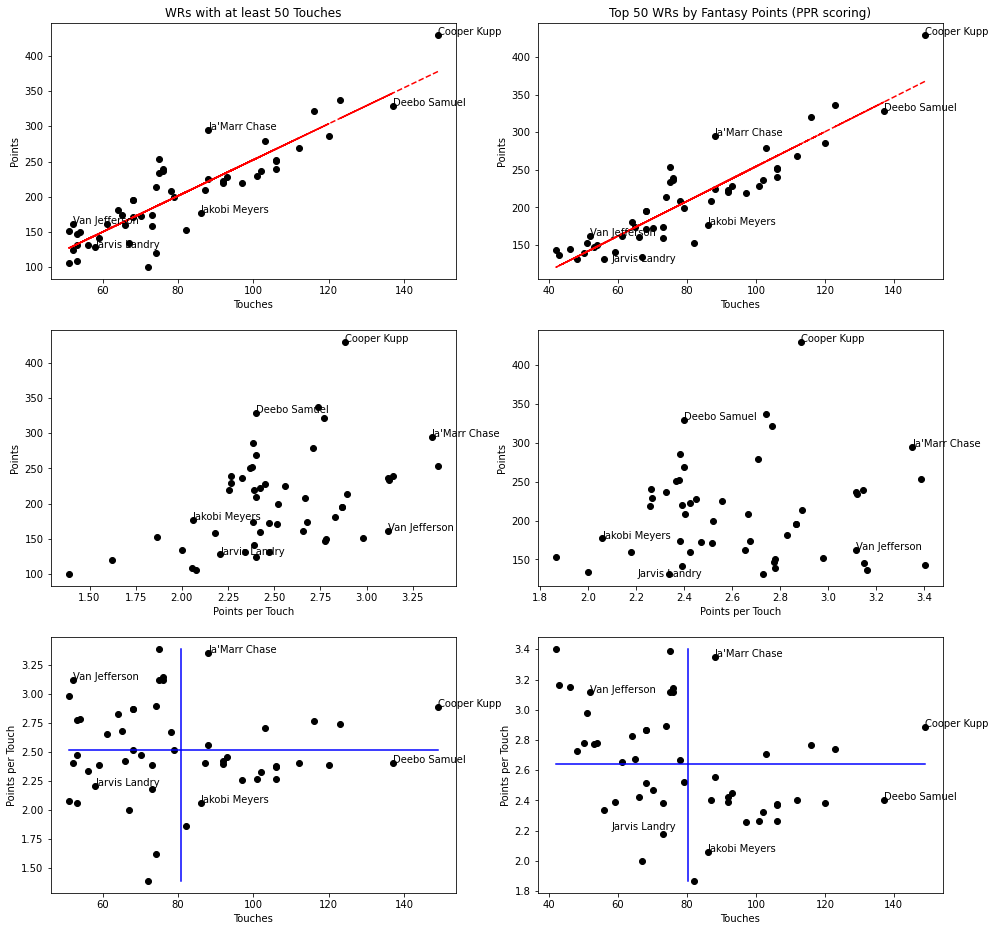

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(16,16))

make_plts(wr50touches, top50wr, axs)

axs[0,0].set_title("WRs with at least 50 Touches")
axs[0,1].set_title("Top 50 WRs by Fantasy Points (PPR scoring)")

player1 = wr50touches[wr50touches["Touches"] < 60].iloc[0]
player2 = wr50touches[(wr50touches["Touches"] < 60) & (wr50touches["Points per Touch"] < 2.25)].iloc[0]
player3 = wr50touches[wr50touches["Touches"] > 140].iloc[0]
player4 = wr50touches[(wr50touches["Touches"] > 130) & (wr50touches["Points per Touch"] < 2.5)].iloc[0]
player5 = wr50touches[(wr50touches["Touches"] > 80) & (wr50touches["Points per Touch"] > 3.)].iloc[0]
player6 = wr50touches[(wr50touches["Touches"] > 80) & (wr50touches["Points per Touch"] < 2.2)].iloc[0]

add_annot(player1, axs)
add_annot(player2, axs)
add_annot(player3, axs)
add_annot(player4, axs)
add_annot(player5, axs)
add_annot(player6, axs)

plt.show()

In the above middle two plots, we can see that as touches increase so do points. Naturally, the first thought that comes to mind is that the players with the most touches must be very efficient with their touches. However, the bottom two plots show that this may not always be the case. There are several data points with high points per touch and low points scored. This may be due to underutilized players in systems that they do not fit in. One example of this is Odell Beckham Jr who escaped the terrible Cleveland Browns organization and won a super bowl with the Los Angeles Rams.

Another thing we noticed from the first two plots is that high touches does not always equal high points per touch, as feeding one player the ball too much may hinder their ability to gather fantasy points efficiently. For wide receivers with at least 50 touches, the mean points per touch was about 2.5, while for the top 50 wide receivers in terms of points scored, the mean points per touch was about 2.6. From this information, we can see that the fringe top 50 wide receivers that did not get as many touches as some other players had to be very efficient in order to help their team, and they were successful in doing this.

We also highlighted extreme wide receivers, particularly players with high touches and low points per touch and players with low touches and high points per touch.

### Running Backs
Now we will look at the same graphs and statistics, but now for running backs.

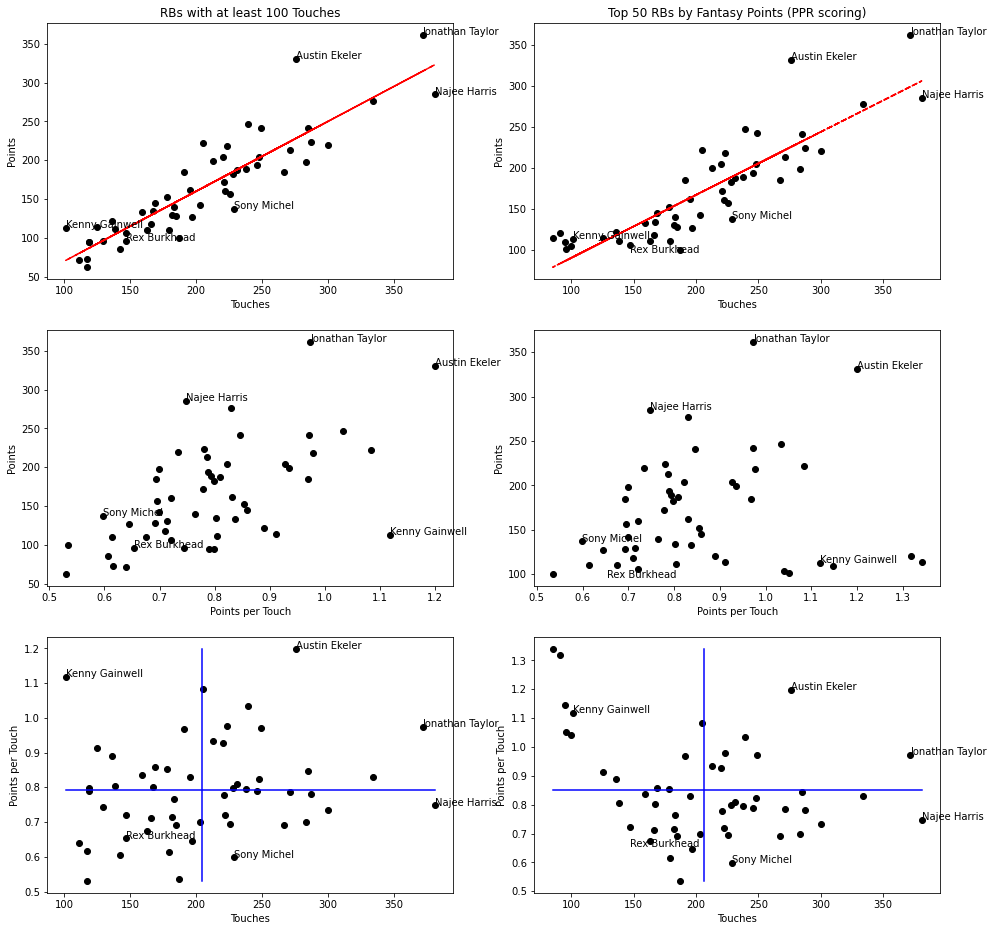

In [19]:
fig, axs = plt.subplots(3, 2, figsize=(16,16))

make_plts(rb100touches, top50rb, axs)

axs[0,0].set_title("RBs with at least 100 Touches")
axs[0,1].set_title("Top 50 RBs by Fantasy Points (PPR scoring)")

player1 = rb100touches[(rb100touches["Touches"] < 150) & (rb100touches["Points per Touch"] > 1.)].iloc[0]
player2 = rb100touches[(rb100touches["Touches"] > 250) & (rb100touches["Points per Touch"] > 1.)].iloc[0]
player3 = rb100touches[(rb100touches["Touches"] > 350) & (rb100touches["Points per Touch"] > .8)].iloc[0]
player4 = rb100touches[(rb100touches["Touches"] < 150) & (rb100touches["Points per Touch"] < .7)].iloc[0]
player5 = rb100touches[(rb100touches["Touches"] > 350) & (rb100touches["Points per Touch"] < .8)].iloc[0]
player6 = rb100touches[(rb100touches["Touches"] < 250) & (rb100touches["Points per Touch"] < .65)].iloc[0]

add_annot(player1, axs)
add_annot(player2, axs)
add_annot(player3, axs)
add_annot(player4, axs)
add_annot(player5, axs)
add_annot(player6, axs)

plt.show()

Above we are looking at running backs. We expect the points per touch for running backs to be much lower than wide receivers, due to running backs not getting a point for every rushing attempt. In the middle two plots, we saw the same trend as the wide receivers, meaning that as touches increase, so do points. We also see the same trend in the first two plots. For running backs with at least 100 touches, the mean points per touch was about 0.8, while for the top 50 running backs in terms of points scored, the mean points per touch was about 0.85. The context behind this is likely due to “third down running backs” who only come into the game when the team is in an obvious passing situation. Many of these running backs are perfect for fantasy football as they rack up yards while also racking up receptions, making them much more valuable.

We also highlighted extreme running backs, particularly players with high touches and low points per touch and players with low touches and high points per touch.

### Tight Ends
Lastly, we will look at these statistics graphed based on TE data.

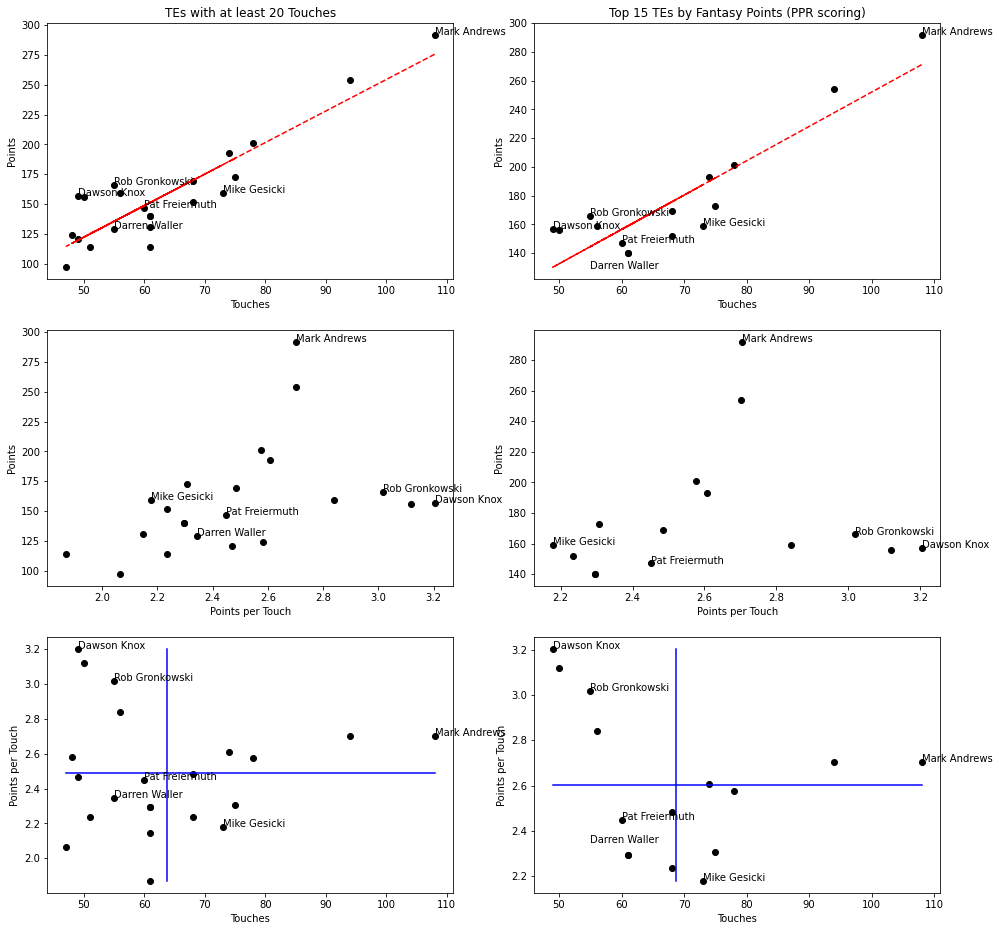

In [20]:
fig, axs = plt.subplots(3, 2, figsize=(16,16))

make_plts(te40touches, top15te, axs)

axs[0,0].set_title("TEs with at least 20 Touches")
axs[0,1].set_title("Top 15 TEs by Fantasy Points (PPR scoring)")

player1 = te40touches[(te40touches["Touches"] < 50) & (te40touches["Points per Touch"] > 2.5)].iloc[0]
player2 = te40touches[(te40touches["Touches"] > 40) & (te40touches["Points per Touch"] > 3.)].iloc[0]
player3 = te40touches[(te40touches["Touches"] > 100)].iloc[0]
player4 = te40touches[(te40touches["Touches"] > 60) & (te40touches["Points per Touch"] < 2.25)].iloc[0]
player5 = te40touches[(te40touches["Touches"] < 65) & (te40touches["Points per Touch"] < 2.6)].iloc[0]
player6 = te40touches[(te40touches["Touches"] < 60) & (te40touches["Points per Touch"] < 2.5)].iloc[0]

add_annot(player1, axs)
add_annot(player2, axs)
add_annot(player3, axs)
add_annot(player4, axs)
add_annot(player5, axs)
add_annot(player6, axs)

plt.show()

The tight end position showed the most volatility of each position, for good reason. Most tight ends are only on the field to block, and end up receiving the ball only because the defense forgot about them. There are not many tight ends that are on the field to receive the football. Due to this, we see the trend of the first two plots continuing. For tight ends with at least 20 touches, the mean points per touch was about 2.3, while for the top 15 tight ends in terms of points scored, the mean points per touch was about 2.6. Also, for the top 15 tight ends in the league there was a lot of variation in terms of points per touch. This can be seen in the bottom right graph, as this is likely due to different players in different schemes, such as players like George Kittle being a vertical threat, while players like Kyle Pitts are more of a short to mid yardage receiver.

While there were not many high scoring fantasy tight ends, we tried to highlighted extreme running backs. Particularly players with high touches and low points per touch and players with low touches and high points per touch.

## <center> Hypothesis Testing <center>
For this section, we will be doing analyses based on our Touches vs Points per Touch graph, which we graphed for each position. When we say "Top Left" of the graph, we are refering to all of the players above the mean PPT line and to the left of the mean touches line. For example, In the graphs above related to Tight Ends, Darren Waller is in the "Bottom Left" of each graph.

### Our Touches vs Points per Touch graph defines a metric which shows how efficient a player is and how much a player is used. Our metric defines 4 types of players:
#### 1. Promising: these players have high efficiency (PPT) but low usage. (Top left )
#### 2. The Best: these players have high efficiency and high usage. (Top right)
#### 3. The Worst: these players have low efficiency and low usage. (Bottom left)
#### 4. Dominant: these players have high usage but low efficiency. (Bottom right)

To save time since we will be testing our hypothesis on WR, RB, and TE, we will only be testing how well our metric classifies bad players. We will test this by comparing our list of The Worst fantasy players to the consensus rankings by fantasy experts on fantasypros.com.

This function below gets the fantasypros.com rankings for each position, which we will use to test our metric.

In [12]:
def getRankings(url):
    df = getTable(url)[0]
    df["Player Team (Bye)"] = list(map(lambda x: re.search("[A-Z][^\s]*\s[A-Z][^\s]*", x).group(), df["Player Team (Bye)"]))
    df.rename(columns={"Player Team (Bye)": "Player Name"}, inplace=True)
    
    return df
    
wrRankings = getRankings("https://www.fantasypros.com/nfl/adp/ppr-wr.php")
rbRankings = getRankings("https://www.fantasypros.com/nfl/adp/ppr-rb.php")
teRankings = getRankings("https://www.fantasypros.com/nfl/adp/ppr-te.php")
rbRankings.head()

#below, we show an example of what the RB rankings dataframe looks like. 

,RB,Overall,Player Name,ESPN,RTSports,MFL,Fantrax,FFC,Sleeper,AVG
0,1,1,Jonathan Taylor,1.0,1.0,NaN,1.0,1.0,1.0,1.0
1,2,2,Austin Ekeler,3.0,2.0,NaN,2.0,4.0,5.0,2.8
2,3,3,Derrick Henry,4.0,5.0,NaN,3.0,2.0,4.0,3.5
3,4,5,Christian McCaffrey,2.0,3.0,NaN,6.0,9.0,2.0,5.0
4,5,6,Dalvin Cook,7.0,6.0,NaN,4.0,5.0,3.0,5.5


We will use the "RB" column for the example above. Basically, this column shows what fantasypros.com ranks each player out of their position.

In [13]:
#As discussed before, our graph's bottom left corner is what we are hypothesizing are bad players.
def get_bad(df): #returns a list of the players in the bottom left corner
    meanTouches = np.mean(df["Touches"])
    meanPPT = np.mean(df["Points per Touch"])
    bad_players = []
    
    for ind,player in df.iterrows():
        if (player["Touches"]<meanTouches)[0] and (player["Points per Touch"] < meanPPT)[0]:
            bad_players.append(player["Player Name"][0])
        
    return bad_players

def getPlayerRanking(player, posRankings, pos):
    player = re.search("[A-Z][^\s]*\s[A-Z][^\s]*", player).group()
    
    ranking = posRankings[posRankings["Player Name"] == player]
    
    if ranking.empty:
        return None
    
    return ranking.iloc[0][pos]

In this cell, we create a list of players in the bottom left of our plots. These are the players we are hypothesizing are "bad" fantasy players.

In [18]:
#this returns a list that contains the players and their ranking by fantasypros.com
def playerRankTuple(df, dfRankings, pos):
    bad_players = get_bad(df)

    return list(map(lambda x: (x, getPlayerRanking(x, dfRankings, pos)), bad_players))

#Each of these 6 lists are tuples of each player and their given ranking by fantasypros.com.
#We will use this data to see how accurate our classification of "bad" is.
badWRtouches = playerRankTuple(wr50touches, wrRankings, "WR")
badWRpts = playerRankTuple(top50wr, wrRankings, "WR")

badRBtouches = playerRankTuple(rb100touches, rbRankings, "RB")
badRBpts = playerRankTuple(top50rb, rbRankings, "RB")

badTEtouches = playerRankTuple(te40touches, teRankings, "TE")
badTEpts = playerRankTuple(top15te, teRankings, "TE")

### <center>Testing our metric's accuracy <center>

In this cell, we are seeing how accurate our metric is on telling whether a fantasy player is good or bad. We already have our list of "Bad" players for each position, which is simply the players in the bottom left corner for our "Touches vs Points per Touch" graphs. We also now have a list of each player we classified as "bad", and their overall ranking according to fantasypros.com.

To test how accurate our metric is at classifying "bad" players, we defined a threshold ranking for each position. This threshold number basically says "any player above this threshold is a bad player". 

For wide receivers, we decided this threshold should be 36. We decided it should be 36 since the amount of start-able wide receivers in fantasy football is approximately 36. There are usually 12 teams in fantasy football, and each team can start a maximum of 3 receivers per week. 12 times 3 gives us 36, meaning that only 36 wide receivers can be started each week. We decided that any receiver out of the top 36 is considered a "bad" fantasy wide receiver, since these players are considered to not be starting wide receivers.

For running backs, we used the same 36 as a starting point, but since there are less fantasy-relevant running backs from our experience every year, we decided to bring it down slightly to 30.

For tight ends, we decided to use 8 as our threshold, since there are almost never "good" tight ends, and since our data is only looking at ~top 15 tight ends, so relatively there will be more "bad" tight ends from our metric since there are less in the sample size.

In [22]:
wrResults = 0
rbResults = 0
teResults = 0

wrlen = len(badWRtouches) + len(badWRpts)
rblen = len(badRBtouches) + len(badRBpts) 
telen = len(badTEtouches) + len(badTEpts)

for wr, rank in badWRtouches + badWRpts:
    if rank != None and rank <= 36:
        wrResults = wrResults + 1

for rb, rank in badRBtouches + badRBpts:
    if rank != None and rank <= 30:
        rbResults = rbResults + 1

for te, rank in badTEtouches + badTEpts:
    if rank != None and rank <= 8:
        teResults = teResults + 1
        
print("WR Accuracy:", (100. - (wrResults/wrlen*100)), "%")
print("RB Accuracy:", (100. - (rbResults/rblen*100)), "%")
print("TE Accuracy:", (100. - (teResults/telen*100)), "%")
print("Total Accuracy:", (100. - (wrResults+rbResults+teResults)/(wrlen+rblen+telen)*100), "%")

WR Accuracy: 95.83333333333333 %
RB Accuracy: 70.96774193548387 %
TE Accuracy: 71.42857142857143 %
Total Accuracy: 79.71014492753623 %


Looking at thre results from our metric, it did a great job at classifying bad wide receivers. As for running backs and tight ends, it had about a ~70% accuracy rate, which although is not bad, still should be approached with caution if trying to use this metric to rank those positions.

Overall, the metric does a good job at classifying bad fantasy players. For the wide receiver postion, this metric could most definitely be used when you are at your next fantasy draft. Although the running back and tight end positions did not have the accuracy we wanted, they show that the metric does at least a good job at predicting, showing that this metric should be considered when also drafting those positions.

## <center> Conclusion <center>

When drafting for fantasy football, there are many factors to take into consideration. This includes things such as a player's injury history, a player changing teams, or even personal bias towards a player. This tutorial showed that the most important factor in choosing a player is the amount of "points per touch" that player scores. Using this statistic as a measuring tool for each position, the running back position may be somewhat overrated in terms of PPR leagues. The top 50 running backs only had a point per touch of around 0.85 compared to the 2.6 points per touch for the top 50 wide receivers and top 15 tight ends. When drafting in fantasy football, a lot of emphasis is put on getting good running backs to solidify your team. While this approach is solid, it can be improved by trying to find wide receivers with high points per touch that are not drafted very high. It would also help to find tight ends that are efficient with their touches that are sleepers in your fantasy leagues.